In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data yang digunakan

df_energy = pd.read_csv('energydata_complete.csv')

In [3]:
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

### Exploratory Data Analysis

#### Penggunaan Daya di Setiap Waktu

In [3]:
df_energy['date'] = pd.to_datetime(df_energy['date'])

In [4]:
dates = df_energy.groupby(df_energy['date'].dt.strftime('%y%m%d'))
month = df_energy.groupby(df_energy['date'].dt.strftime('%m'))
hours = df_energy.groupby(df_energy['date'].dt.strftime('%H'))

In [7]:
month.count()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
01,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,...,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922
02,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,...,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
03,4464,4464,4464,4464,4464,4464,4464,4464,4464,4464,...,4464,4464,4464,4464,4464,4464,4464,4464,4464,4464
04,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,...,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320
05,3853,3853,3853,3853,3853,3853,3853,3853,3853,3853,...,3853,3853,3853,3853,3853,3853,3853,3853,3853,3853


In [5]:
month1 = df_energy[df_energy['date'].dt.strftime('%m')=='01']
m1 = month1.groupby(month1['date'].dt.strftime('%y%m%d'))
month2 = df_energy[df_energy['date'].dt.strftime('%m')=='02']
m2 = month2.groupby(month2['date'].dt.strftime('%y%m%d'))
month3 = df_energy[df_energy['date'].dt.strftime('%m')=='03']
m3 = month3.groupby(month3['date'].dt.strftime('%y%m%d'))
month4 = df_energy[df_energy['date'].dt.strftime('%m')=='04']
m4 = month4.groupby(month4['date'].dt.strftime('%y%m%d'))
month5 = df_energy[df_energy['date'].dt.strftime('%m')=='05']
m5 = month5.groupby(month5['date'].dt.strftime('%y%m%d'))

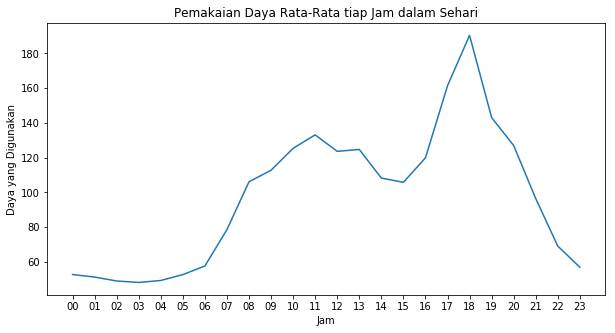

In [9]:
plt.figure(figsize=[10,5])
plt.title('Pemakaian Daya Rata-Rata tiap Jam dalam Sehari')
plt.plot(hours['Appliances'].mean())
plt.xlabel('Jam')
plt.ylabel('Daya yang Digunakan')
plt.show()

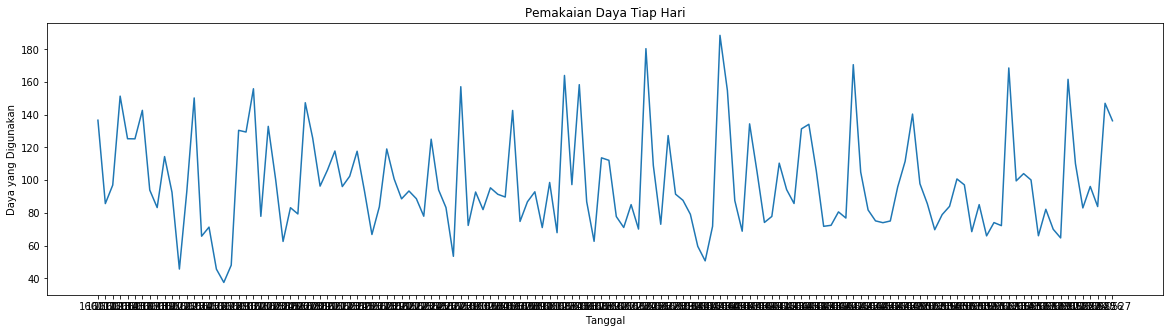

In [10]:
plt.figure(figsize=[20,5])
plt.title('Pemakaian Daya Tiap Hari')
plt.plot(dates['Appliances'].mean())
plt.xlabel('Tanggal')
plt.ylabel('Daya yang Digunakan')
plt.show()

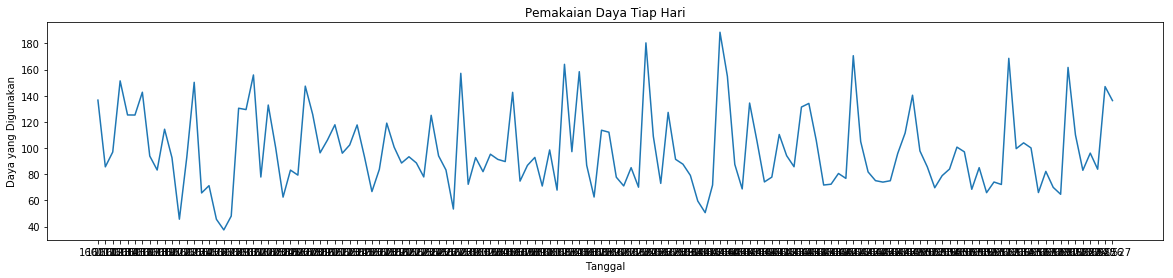

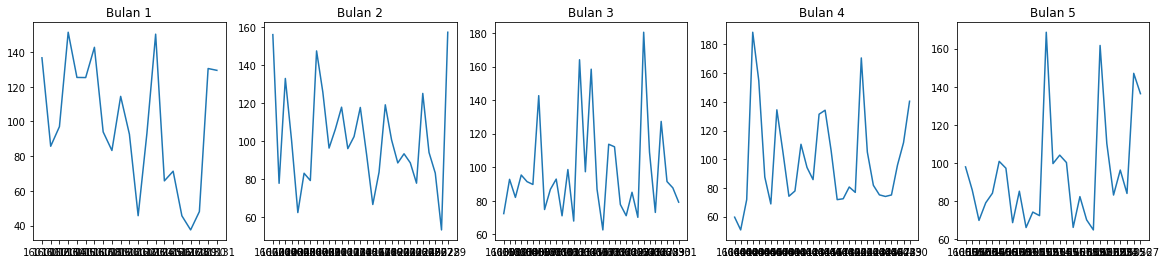

In [11]:
plt.figure(figsize=[20,4])

plt.title('Pemakaian Daya Tiap Hari')
plt.plot(dates['Appliances'].mean())
plt.xlabel('Tanggal')
plt.ylabel('Daya yang Digunakan')
plt.show()

plt.figure(figsize=[20,4])
plt.subplot(151)
plt.plot(m1['Appliances'].mean())
plt.title('Bulan 1')

plt.subplot(152)
plt.plot(m2['Appliances'].mean())
plt.title('Bulan 2')

plt.subplot(153)
plt.plot(m3['Appliances'].mean())
plt.title('Bulan 3')

plt.subplot(154)
plt.plot(m4['Appliances'].mean())
plt.title('Bulan 4')

plt.subplot(155)
plt.plot(m5['Appliances'].mean())
plt.title('Bulan 5')

plt.show()

In [6]:
df_energy_days = df_energy
weekdays = []
for key, row in df_energy_days.iterrows() :
    weekdays.append(row['date'].weekday())
df_energy_days['weekday'] = weekdays

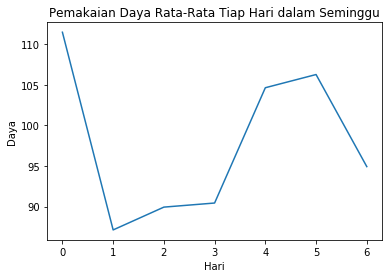

In [13]:
wday = df_energy.groupby(df_energy['weekday'])
plt.plot(wday['Appliances'].mean())
plt.title('Pemakaian Daya Rata-Rata Tiap Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Daya')
plt.show()

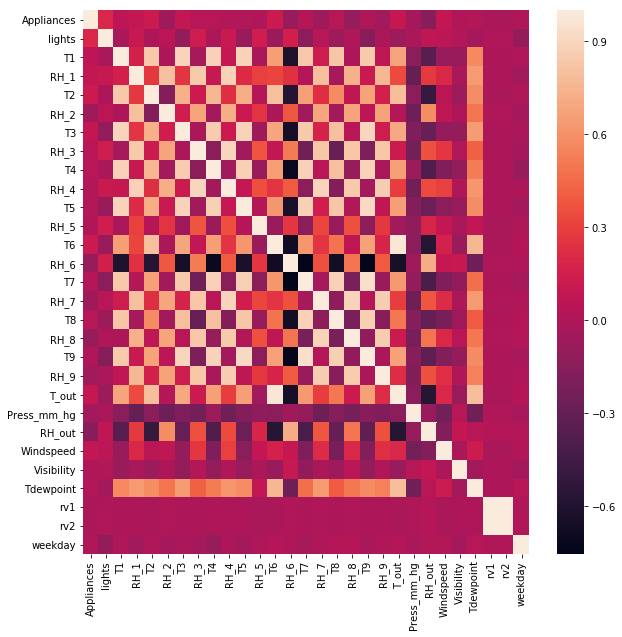

In [12]:
plt.figure(figsize=[10,10])
sns.heatmap(df_energy.drop('date',axis=1).corr())
plt.show()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,0
